# Lab 07 - Introduction to the Oscilloscope

In [1]:
import numpy as np
import data_entry
import matplotlib.pyplot as plt

## Part A - FAMILIARIZE, Part 1 - Overview of your resistor-capacitor (RC) circuit and the oscilloscope tutorial

***Write down any important notes about the oscilloscope and circuit here.***

- The oscilloscope analyzes the *dynamics* of a circuit; in our case we will look at how voltage evolves over time in an RC circuit
- "RC" refers to a resistor-capacitor circuit
- The resistor and capacitor are connected in parallel
    - When a switch is closed, the current flows to the capacitor, thus charging it up
    - When the switch is opened, the capacitor discharges through the resistor, resulting in the voltage decaying
- The dynamics happen very quickly, so we use "triggering" to freeze the discharge event in time
- We want to trigger when the voltage falls below a certain threshold voltage (set by the trigger level), which is somewhere between the maximum and minimum voltage during the discharge
- We also want the decaying signal to take up most of the screen, so we should adjust the horizontal (time) and vertical (voltage) resolutions to achieve this
- Once we have our discharge event frozen in time, we use horizontal and vertical cursors to isolate two points on the curve: $(t_1, V_1)$ and $(t_2, V_2)$
- Using the given formula in the student instructions, from these four quantities we can determine the time constant $\tau$ at a given resistance $R$.

## Part B - FAMILIARIZE, Part 2 - Make an initial set of measurements

***Before making any measurements, record the number on your capacitor in your lab notes. You will use this same setup next week and will be able to continue using your data from this week as long as you are certain you are using the same capacitor.***

- We used capacitor number 7 for our data
- We use the suggested initial resistance of $5000 \Omega$ and voltage of $1.3 V$, then set the trigger level to $\sim 700 mV$
- We find that the decay takes up only a small part of the middle of the screen, so we zoom in temporally
- With the decaying signal now taking up most of the screen, we choose two points
    - The first is just past the initial decay at $(-450 ms, 1.18 V)$
    - The second is lower in the decay curve at $(500 ms, 176 mV)$
- For uncertainty, after discussing with the TA we decide to fix $t$ and user the cursor resolution to define a uniform PDF for $u[t]$, i.e. $u[t] = a/\sqrt{3}$ where $a$ is half of the cursor resolution
- For $u[V]$, we notice the fuzziness of the line is thicker than the horizontal cursor resolution and thus is limiting the precision of our measurement, so we use a Gaussian PDF where the 95\% CI is defined by the upper and lower bounds of the fuzzy line
- We note that when $V$ is changing rapidly (during the initial portion of the decay), the upper and lower bounds are spread farther apart since the line is steeper here

Calculation of $\tau$ is done below.

In [14]:
t1 = -450e-6
t2 = 500e-6
V1 = 1.18
V2 = 0.176

a = 2e-6 / 2 # cursor resolution at this zoom is 2 microseconds
ut1 = a / np.sqrt(3)
ut2 = ut1 # identical timing uncertainty for both measurements

uV1 = (1.19 - 1.17) / 4
uV2 = (0.184 - 0.168) / 4

""" breaking down tau calculation into subproblems for uncertainty propagation """
dT = t2 - t1
udT = np.sqrt(ut1**2 + ut2**2)
W = V1/V2
uW = W * np.sqrt( (uV1/V1)**2 + (uV2/V2)**2 )

logW = np.log(W)
ulogW = uW / W

tau = dT / logW
utau = tau * np.sqrt( (udT/dT)**2 + (ulogW/logW)**2 )

print(tau*1e6, utau*1e6)

R = 5000 # in Ohms
uR = 0.01*R
C = tau / R
uC = C * np.sqrt( (utau/tau)**2 + (uR/R)**2 )
print(C*1e6, uC*1e6)

499.2679884054382 6.081278217454613
0.09985359768108763 0.001573642871591


From this initial measurement we find $\tau=499.3 \pm 6.1\mu s$, which gives a capacitance of $C = 0.0999 \pm 0.0016 \mu F$, which is very close to the theoretical value of $0.1 \mu F$.

## Part C - FAMILIARIZE, Part 3 - Develop your measurement strategy for further measurements

***Include some notes on the questions from Part C of the student instructions.***

Below we collect four points in addition to our initial point from Part B, such that we have five initial data points. From our observations we can answer the following questions:

- **How does increasing/decreasing the resistance affect the decay curve shown on the oscilloscope?**
Increasing $R$ stretches out the decay. This is because $\tau = RC$, so with $C$ a fixed quantity of the capacitor, when $R$ increases $\tau$ increases proportionally. Since $\tau$ is the decay constant of the discharge event, when $\tau$ increases the length of the decay increases. When this happens, we have to zoom out to capture the full curve, thus making our temporal resolution worse and ultimately increasing $u[t]$.

- **What are the practical maximum and minimum resistances that can be used?**
When we increase $R>>5000\Omega$, the decay time takes much longer and thus our temporal resolution is increasingly worse. Thus, we stick to $R<10000\Omega$ for now. When $R<<5000\Omega$, the decay happens very quickly and we start to see artifacts in the signal. Thus, we also stick to $R>1000\Omega$ for now.

- **How should the R values be spaced in order to make an informative scatter plot?**
We expect $\tau$ vs. $R$ to be linear, so we should pick roughly evenly-spaced $R$ to have a good sampling of the distribution of $\tau$. Therefore we plane to sample $R\in [1000,10000] \Omega$ in $1000\Omega$ intervals.

In [33]:
de = data_entry.sheet("lab07_data")
print(ut1*2)

Sheet name: lab07_data.csv


1.1547005383792516e-06


## Part D - MEASURE & ANALYZE - Collect additional data and create a scatter plot

Below we calculate $\tau$ for each $R$ set and plot our initial scatter plot. The data look extremely linear and the errorbars are so small that they are hard to see in the plot. However, a residuals plot and chi-squared will help us determine a good fit to the data.

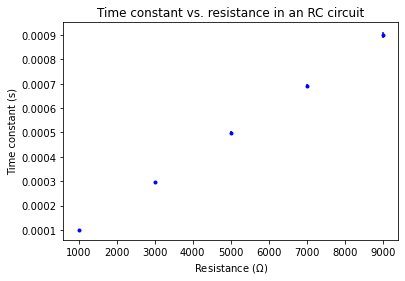

In [44]:
dTVec = t2Vec - t1Vec
udTVec = np.sqrt(ut1Vec**2 + ut2Vec**2)
WVec = V1Vec/V2Vec
uWVec = WVec * np.sqrt( (uV1Vec/V1Vec)**2 + (uV2Vec/V2Vec)**2 )

logWVec = np.log(WVec)
ulogWVec = uWVec / WVec

tauVec = dTVec / logWVec
utauVec = tauVec * np.sqrt( (udTVec/dTVec)**2 + (ulogWVec/logWVec)**2 )

plt.errorbar(RVec, tauVec, utauVec, fmt = "bo", markersize = 3, label = "Experimental data")
plt.title("Time constant vs. resistance in an RC circuit")
plt.xlabel("Resistance ($\Omega$)")
plt.ylabel("Time constant (s)")
plt.show()

## Part E - COMPARE, SUMMARIZE, REFLECT

Below we define a model fit and overlay the model on our initial scatter plot. Our initial guess for the model is zero intercept and a slope of the theoretical capacitance of $1\times 10^-{7} F$. After making a residuals plot and calculating chi-squared, we iteratively adjusted the slope and found $0.99 \times 10^{-7} F$ minimized chi-squared ($\chi^2=1.07$). This produces a fit with no structure in the residuals, even scatter above and below, and roughly 2/3 of errorbars crossing the x-axis. $\chi^2 \approx 1$ and these observations tell us our fit is good and our assumption of no intercept is reasonable. The slope is very close to the expected capacitance of $1\times 10^{-7} F$.

1.0730402934402585


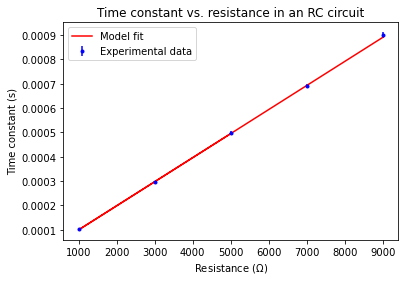

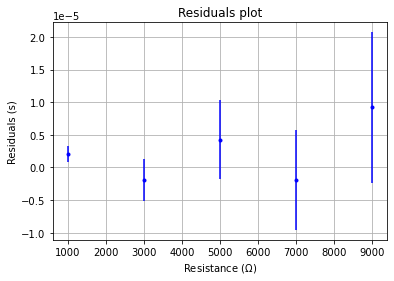

In [59]:
slope = 0.99e-7
modelVec = slope*RVec

""" residuals and chi-squared """
residuals = tauVec - modelVec
wResiduals2 = (residuals / utauVec)**2 # weighting the residuals and squaring
P = 1 # number of parameters
N = len(tauVec) # number of data points
chi2 = np.sum(wResiduals2) / (N - P)
print(chi2)

""" plotting """
plt.errorbar(RVec, tauVec, utauVec, fmt = "bo", markersize = 3, label = "Experimental data")
plt.plot(RVec, modelVec, "r", label = "Model fit")
plt.title("Time constant vs. resistance in an RC circuit")
plt.xlabel("Resistance ($\Omega$)")
plt.ylabel("Time constant (s)")
plt.legend()
plt.show()

plt.errorbar(RVec, residuals, utauVec, fmt = "bo", markersize = 3)
plt.grid()
plt.title("Residuals plot")
plt.xlabel("Resistance ($\Omega$)")
plt.ylabel("Residuals (s)")
plt.show()

For future improvements, we will increase the number of data points by filling in the gaps at 2000, 4000, 6000, and 10000 $\Omega$. This will gives us a better characterization of the slope in the current range of resistances investigated. Then, to test the extremes of system, we will also take measurements at $500\Omega$ and several at much higher $R$. This will test the limitations of our model.